## Урок 1.
# Введение в задачу классификации.<br>Постановка задачи и подготовка данных.

**План занятия**

* [Теоретическая часть](#theory)
    * [Задача классификации](#classification)
    * [Метрики качества](#metrics)
* [Практическая часть](#practice)
    * [Постановка задачи](#task)
    * [Загрузка данных](#load_data)
    * [Приведение типов](#cast)
    * [Обзор данных](#review)    
    * [Обработка пропусков](#gaps)
    * [Обработка выбросов](#outliers)
    * [Построение новых признаков](#new_features)
    * [Сохранение обучающего датасета](#saving)
* [Курсовой проект](#course_project)
    * [Постановка задачи](#course_project_task)
    * [Примерное описание этапов выполнения курсового проекта](#course_project_steps)
    * [Обзор данных](#course_project_review)    

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

### Задача классификации<a class="anchor" id="classification"></a>

Имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Для некоторых объектов из этого множества известна их классовая принадлежность - это подмножество называется обучающей выборкой. Классовая принадлежность остальных объектов не известна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества.

*Классифицировать объект* — значит, указать номер (или наименование класса), к которому относится данный объект.

*Классификация объекта* — номер или наименование класса, выдаваемый алгоритмом классификации в результате его применения к данному конкретному объекту.

Ссылка на источник:<br>
http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F

**Бинарная классификация**

Данные разделены на два класса, необходимо обучить модель определять принадлежность произвольного объекта (из рассматриваемого множества) к одному из них. На выходе алгоритм должен выдавать либо метку одного из двух классов, либо вероятности принадлежности рассматриваемого объекта к каждому из них.

*Пример решения задачи бинарной классификации с помощью линейной модели*

<img src="bin_class.png">

*Пример решения задачи бинарной классификации с помощью деревьев решений*

<img src="bin_class2.jpg">

In [2]:
import seaborn

# необходимые пакеты
import matplotlib.pyplot as plt
import numpy as np



[-0.70710678 -0.70710678]


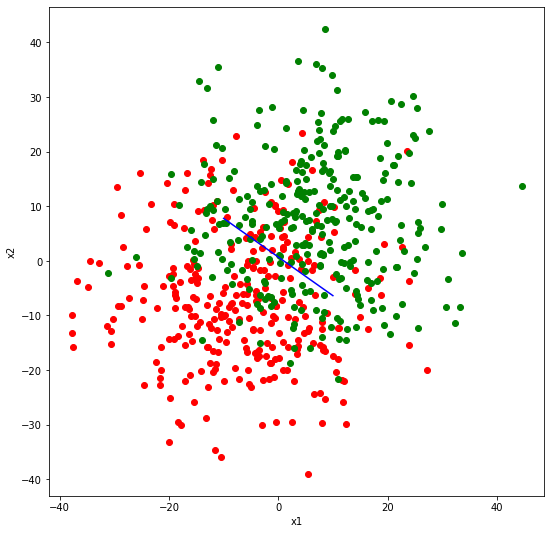

In [3]:
def line_x1(x1,w):
    return (w[1]* x1 -w[0])

N= 300
n = 2 

gD = 12
gM = 7
rD=12
rM = -7.5
# генерируем зелёные точки
x1x2_green = np.random.randn(N, n) * gD + gM

# генерируем красные точки
x1x2_red = np.random.randn(N, n) * rD + rM

# all in set
x1x2 = np.concatenate((x1x2_green, x1x2_red))

# проставляем классы: зелёные +1, красные -1
labels = np.concatenate((np.ones(x1x2_green.shape[0]), -np.ones(x1x2_red.shape[0])))

# рисуем точки

plt.figure(figsize=(15,9))
plt.plot(x1x2_red[:,0],x1x2_red[:,1], 'ro')
plt.plot(x1x2_green[:,0],x1x2_green[:,1], 'go')        
# выставляем равное пиксельное  разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')
        
# рисуем границу
x1_range = np.array([-10.0, 10.0])
w = (np.array([rM,rM])+np.array([gM,gM]))
w = w/np.sqrt(np.sum(w ** 2))
print(w)


plt.plot(x1_range, line_x1(x1_range,w), color='blue')

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split 

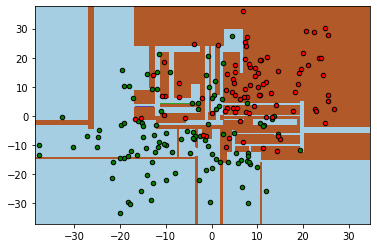

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x1x2, labels, test_size=0.33)

clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)


plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
for i, n, c in zip([-1,1], 'gr', 'gr'):
    idx = np.where(y_pred == i)
    plt.scatter(X_test[idx, 0], X_test[idx, 1],c=c, cmap=plt.cm.Paired, s=20, edgecolor='k',label="Class %s" % n)
plt.show()    


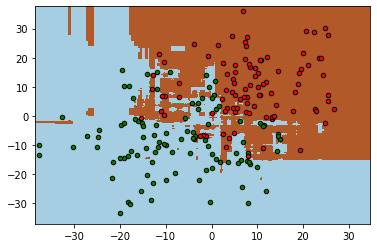

In [6]:


cle = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred = cle.predict(X_test)


plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = cle.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
for i, n, c in zip([-1,1], 'gr', 'gr'):
    idx = np.where(y_pred == i)
    plt.scatter(X_test[idx, 0], X_test[idx, 1],c=c, cmap=plt.cm.Paired, s=20, edgecolor='k',label="Class %s" % n)
plt.show()    

**Многоклассовая классификация**

Постановка задачи аналогична задаче бинарной классификации, при условии, что количество классов больше двух.
Решается задача, как правило, с помощью всё тех же бинарных классификаторов, но используются различные подходы при их обучении и агрегации прогнозов.

*Подход One-vs-All*

Обучается N бинарных классификаторов, где N - количестве классов и N > 2, таким образом, что каждый из них учится определять только один вид класса от всех остальных. После чего входной объект оценивается каждым из классификаторов и принимается решение об отнесении объекта к одному из N классов, исходя из того, какой классификатор показал большую степень уверенности в том, что объект относится именно к его классу.

<img src="multi_class.png">

In [7]:
from sklearn.datasets import load_iris

(3.5, 8.680000000000005, 1.2999999999999998, 5.180000000000003)

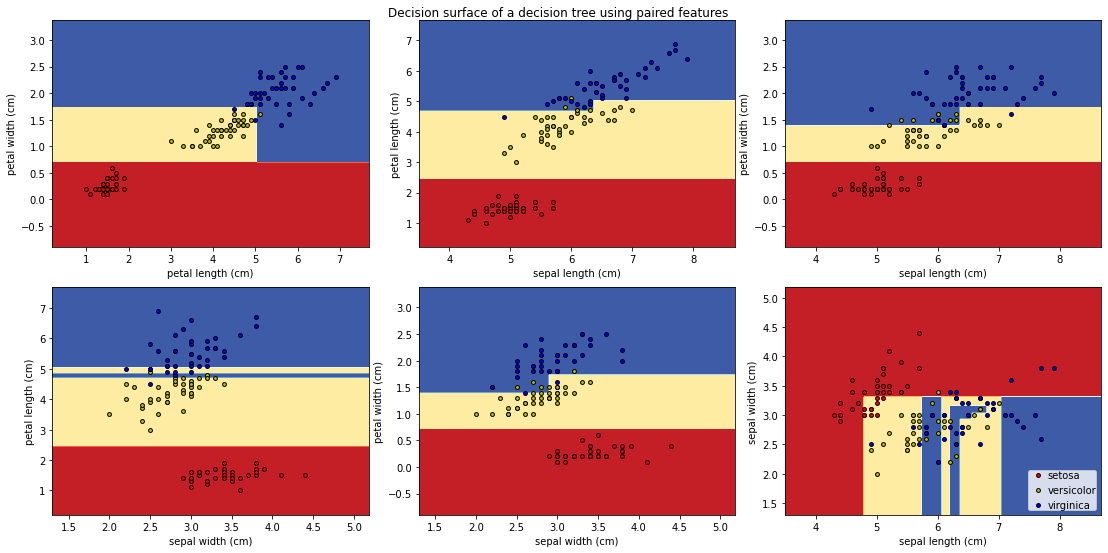

In [8]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.8, shuffle = True)

plt.figure(figsize=(16,8))
for pairidx, pair in enumerate([[2, 3], [0, 2], [0, 3],
                                [1, 2], [1, 3], [0, 1]]):
    # We only take the two corresponding features
    X = X_train[:, pair]
    y = y_train

    # Train
    clf =  DecisionTreeClassifier().fit(X, y)
    y_pred = clf.predict(X_test[:, pair])
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_test == i)
        plt.scatter(X_test[idx, pair[0]], X_test[idx, pair[1]], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")


In [99]:
y_test[:10]

array([0, 2, 1, 0, 0, 1, 1, 1, 0, 1])

In [101]:
y_pred[:10]

array([0, 1, 1, 0, 0, 1, 2, 1, 0, 2])

In [104]:
y_pred_p = clf.predict_proba(X_test[:, pair])

In [106]:
y_pred_p[:10,:]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

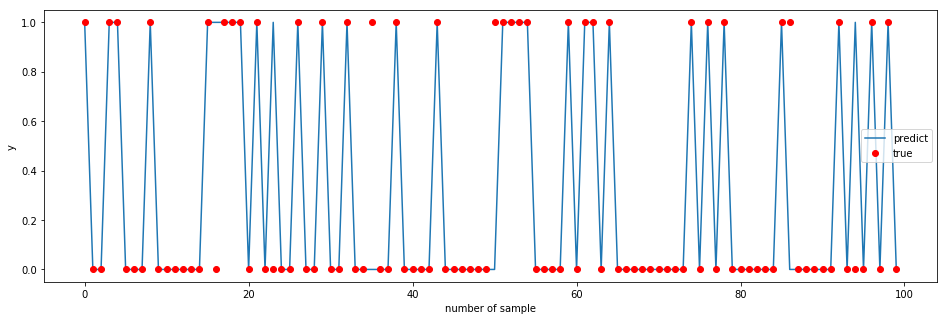

In [105]:
N=100
plt.figure(figsize=(16,5))
plt.plot(y_pred_p[:N,0], label='predict')
plt.plot(y_test[:N]==0,'or',label='true')
plt.legend()
plt.xlabel('number of sample')
plt.ylabel('y')
plt.show()

### Метрики качества<a class="anchor" id="metrics"></a>

**Confusion matrix (матрица ошибок)**

*Пример*

У нас есть выборка из 13 животных, из которых 8 - кошки и 5 - другие животные. После обучения классификатора, мы попробовали определить с его помощью класс животного (кошка это или нет) и что бы более наглядно увидеть результаты его работы построили следующую таблицу, которая называется "матрицей ошибок / неточностей".

<img src="confusion_matrix.jpg">

Positive - алгоритм предсказал, что объект относится к "основному" классу.
* True Positive (TP) - истино-положительное решение, алгоритм предсказал, что объект относится к "основному" классу и оказался прав.
* False Positive (FP) - ложно-положительное решение, алгоритм предсказал, что объект относится к "основному" классу и ошибся.

Negative - алгоритм предсказал, что объект относится к "альтернативному" классу.
* True Negative (TN) - истино-отрицательное решение, алгоритм предсказал, что объект относится к "альтернативному" классу и оказался прав.
* False Negative (FN) - ложно-отрицательное решение, алгоритм предсказал, что объект относится к "альтернативному" классу и ошибся.

Исходя из этой нотации, получается, что 8 животных алгоритм классифицировал верно (5 - кошек и 3 - других вида), а в 5 случаях ошибся (алгоритм не распознал 3 кошки, а 2 других вида животных наоборот принял за кошек).

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_pred,y_test))

[[36  2  1]
 [ 4 31 20]
 [ 0  7 19]]


**Accuracy (доля правильных ответов)**

*Accuracy* - доля правильных ответов отражает процент объектов, для которых классы были определены верно, среди всего множества объектов.

<center>$\large accuracy = \LARGE \frac{T}{N} = \frac{TP \: + \: TN}{TP \: + \: TN \: + \: FP \: + \: FN}$<center>

$T$ - количество объектов, для которых классы были определены верно<br>
$N$ - общее количество объектов

Основная проблема данной метрики в том, что она не позволяет производить более детализированную оценку работы алгоритма, как следствие она может показывать высокое качество в тех случаях, где алгоритм этого явно не заслуживает. 

Как пример рассмотри случай несбалансированной выборки, когда у нас есть 100 объектов, 90 из которых относятся к основному классу, а 10 к альтернатинвому. Мы можем добиться показателя данной метрики равного 0.9 (90% точность модели), если просто задим константную модель, которая всегда будет предсказывать основной класс.

**Precision (точность) & Recall (полнота)**

*Precision* - точность отражает какой процент объектов, отнесённых к "основному" классу, действительно являются таковыми.

*Recall* - полнота отражает какой процент объектов "основного" класса было обнаружено алгоритмом.

<center>$\large precision = \LARGE \frac{TP}{TP \: + \: FP} \:\:\:\:\: \large recall = \LARGE \frac{TP}{TP \: + \: FN}$<center>

<img src="prec_vs_recall.png">

**F-score (F-мера, гармоническое среднее)**

*F-score* - метрика объединяющая в себе точность и полноту, выдавая как результат их гармоническое среднее, а коэффициент $\beta$, позволяет балансирвоать вклад, вносимый точностью, тем самым акцентируя внимание на той метрике, максимизация которой для нас наиболее приоритетна.

Наиболее часто встречающаяся вариация данной метрики - это F1-score, когда $\beta$ = 1, а влияние точности и полноты одинаково.

<center>$\LARGE F_{\beta} = (1+ \beta^2) \cdot \frac{precision \: \cdot \: recall}{(\beta^2 \cdot precision) \: + \: recall}$<center>

In [1]:
print(classification_report(y_pred,y_test))

NameError: name 'classification_report' is not defined

**PR-кривая**

Графичекая характеристика качества бинарного классификатора, отображает зависимость изменения точности алгоритма от его полноты.

<img src="pr-curve.png">

**ROC-кривая**

Графичекая характеристика качества бинарного классификатора, отображает зависимость доли верных положительных классификаций *True Positive Rate (TPR)* от доли ложных положительных классификаций *False Positive Rate (FPR)*.

<center>$\large TPR = \LARGE \frac{TP}{TP \: + \: FN} \:\:\:\:\: \large FPR = \LARGE \frac{FP}{FP \: + \: TN}$<center>

<img src="roc-curve.png">

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

### Постановка задачи<a class="anchor" id="task"></a>

Требуется на основании демографических данных о клиентах банка, истории их платежей и состоянии счета, предсказать невыполнение их обязательств по кредитной карте в следующем месяце.

**Описание датасета**

* **LIMIT_BAL** - Сумма предоставленного кредита
* **SEX** - Пол (1=мужчина, 2=женщина)
* **EDUCATION** - Образование (1=аспирантура, 2=университет, 3=старшая школа, 4=прочее, 5=неизвестно, 6=неизвестно)
* **MARRIAGE** - Семейное положение (1=женат/замужен, 2=не женат/не замуженм, 3=прочее)
* **AGE** - Возраст (в годах)
* **PAY_1** - Статус погашения в Сентябре (-1=погашен полностью, 0=погашен частично, 1=отсрочка платежа на один месяц, .., 3=отсрочка платежа на три месяца и более)
* **PAY_2** - Статус погашения в Августе
* **PAY_3** - Статус погашения в Июле
* **PAY_4** - Статус погашения в Июне
* **PAY_5** - Статус погашения в Мае
* **PAY_6** - Статус погашения в Апреле
* **BILL_AMT1** - Сумма выписки по счету в Сентябре
* **BILL_AMT2** - Сумма выписки по счету в Августе
* **BILL_AMT3** - Сумма выписки по счету в Июле
* **BILL_AMT4** - Сумма выписки по счету в Июне
* **BILL_AMT5** - Сумма выписки по счету в Мае
* **BILL_AMT6** - Сумма выписки по счету в Апреле
* **PAY_AMT1** - Сумма предыдущего платежа в Сентябре
* **PAY_AMT2** - Сумма предыдущего платежа в Августе
* **PAY_AMT3** - Сумма предыдущего платежа в Июле
* **PAY_AMT4** - Сумма предыдущего платежа в Июне
* **PAY_AMT5** - Сумма предыдущего платежа в Мае
* **PAY_AMT6** - Сумма предыдущего платежа в Апреле
* **NEXT_MONTH_DEFAULT** - Просрочка платежа в следующем месяце (1=да, 0=нет)

- - - 

**Подключение библиотек и скриптов**

In [2]:
import numpy as np
import pandas as pd

**Пути к директориям и файлам**

In [3]:
# input
DATASET_PATH = '../training_project_data.csv'

# output
PREP_DATASET_PATH = '../training_project_data_prep.csv'

### Загрузка данных<a class="anchor" id="load_data"></a>

In [4]:
df = pd.read_csv(DATASET_PATH)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
0,150000.0,2,2,2,24,1,2,0,0,0,...,17853.0,34527.0,28277.0,0.0,2145.0,10000.0,22000.0,3000.0,5093.0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,30748.0,30162.0,30016.0,0.0,0.0,0.0,0.0,3100.0,798.0,1
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,6784.0,6923.0,14116.0,0.0,0.0,6784.0,159.0,167.0,760.0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,55182.0,48983.0,50136.0,3500.0,2000.0,20000.0,2000.0,2000.0,2000.0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,47026.0,45971.0,47573.0,0.0,6500.0,1800.0,0.0,2500.0,2000.0,0


In [5]:
df.shape

(10000, 24)

In [6]:
df.iloc[0]

LIMIT_BAL             150000.0
SEX                        2.0
EDUCATION                  2.0
MARRIAGE                   2.0
AGE                       24.0
PAY_1                      1.0
PAY_2                      2.0
PAY_3                      0.0
PAY_4                      0.0
PAY_5                      0.0
PAY_6                      0.0
BILL_AMT1              65542.0
BILL_AMT2              28311.0
BILL_AMT3              23978.0
BILL_AMT4              17853.0
BILL_AMT5              34527.0
BILL_AMT6              28277.0
PAY_AMT1                   0.0
PAY_AMT2                2145.0
PAY_AMT3               10000.0
PAY_AMT4               22000.0
PAY_AMT5                3000.0
PAY_AMT6                5093.0
NEXT_MONTH_DEFAULT         0.0
Name: 0, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           10000 non-null  float64
 1   SEX                 10000 non-null  int64  
 2   EDUCATION           10000 non-null  int64  
 3   MARRIAGE            10000 non-null  int64  
 4   AGE                 10000 non-null  int64  
 5   PAY_1               10000 non-null  int64  
 6   PAY_2               10000 non-null  int64  
 7   PAY_3               10000 non-null  int64  
 8   PAY_4               10000 non-null  int64  
 9   PAY_5               10000 non-null  int64  
 10  PAY_6               10000 non-null  int64  
 11  BILL_AMT1           10000 non-null  float64
 12  BILL_AMT2           10000 non-null  float64
 13  BILL_AMT3           10000 non-null  float64
 14  BILL_AMT4           10000 non-null  float64
 15  BILL_AMT5           10000 non-null  float64
 16  BILL_

### Приведение типов<a class="anchor" id="cast"></a>

In [8]:
for colname in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[colname] = df[colname].astype(str)

In [9]:
df.dtypes

LIMIT_BAL             float64
SEX                    object
EDUCATION              object
MARRIAGE               object
AGE                     int64
PAY_1                  object
PAY_2                  object
PAY_3                  object
PAY_4                  object
PAY_5                  object
PAY_6                  object
BILL_AMT1             float64
BILL_AMT2             float64
BILL_AMT3             float64
BILL_AMT4             float64
BILL_AMT5             float64
BILL_AMT6             float64
PAY_AMT1              float64
PAY_AMT2              float64
PAY_AMT3              float64
PAY_AMT4              float64
PAY_AMT5              float64
PAY_AMT6              float64
NEXT_MONTH_DEFAULT      int64
dtype: object

In [10]:
df.iloc[0]

LIMIT_BAL             150000
SEX                        2
EDUCATION                  2
MARRIAGE                   2
AGE                       24
PAY_1                      1
PAY_2                      2
PAY_3                      0
PAY_4                      0
PAY_5                      0
PAY_6                      0
BILL_AMT1              65542
BILL_AMT2              28311
BILL_AMT3              23978
BILL_AMT4              17853
BILL_AMT5              34527
BILL_AMT6              28277
PAY_AMT1                   0
PAY_AMT2                2145
PAY_AMT3               10000
PAY_AMT4               22000
PAY_AMT5                3000
PAY_AMT6                5093
NEXT_MONTH_DEFAULT         0
Name: 0, dtype: object

### Обзор данных<a class="anchor" id="review"></a>

**Обзор целевой переменной**

In [11]:
df['NEXT_MONTH_DEFAULT'].value_counts()

0    7805
1    2195
Name: NEXT_MONTH_DEFAULT, dtype: int64

**Обзор количественных признаков**

In [12]:
df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,168182.000000,35.39600,51490.560500,49298.972000,47292.40850,43605.665800,40347.829700,38996.784300,5511.82970,5.931217e+03,5385.050600,4585.585700,4712.134300,5055.019400,0.219500
std,130118.668771,9.19536,74906.094564,71808.952137,69398.13263,65062.788893,61044.676044,59682.999879,14748.85889,2.204220e+04,18527.041096,14066.147593,14080.847065,17359.210922,0.413929
min,10000.000000,21.00000,-11545.000000,-24704.000000,-157264.00000,-65167.000000,-23003.000000,-339603.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.00000,3388.000000,3016.500000,2561.75000,2400.000000,1703.250000,1300.750000,1000.00000,7.492500e+02,390.000000,277.250000,300.000000,150.750000,0.000000
50%,140000.000000,34.00000,22896.500000,21576.000000,20370.50000,19194.000000,18261.000000,17338.000000,2163.50000,2.001000e+03,1800.000000,1500.000000,1543.000000,1500.000000,0.000000
75%,240000.000000,41.00000,67834.750000,64243.500000,60783.25000,55731.250000,50491.000000,49696.000000,5001.00000,5.000000e+03,4651.500000,4014.250000,4100.000000,4000.000000,0.000000
max,1000000.000000,75.00000,964511.000000,983931.000000,689643.00000,891586.000000,927171.000000,961664.000000,493358.00000,1.227082e+06,896040.000000,432130.000000,417990.000000,422000.000000,1.000000


In [13]:
df.describe().loc['std']

LIMIT_BAL             130118.668771
AGE                        9.195360
BILL_AMT1              74906.094564
BILL_AMT2              71808.952137
BILL_AMT3              69398.132630
BILL_AMT4              65062.788893
BILL_AMT5              61044.676044
BILL_AMT6              59682.999879
PAY_AMT1               14748.858890
PAY_AMT2               22042.199742
PAY_AMT3               18527.041096
PAY_AMT4               14066.147593
PAY_AMT5               14080.847065
PAY_AMT6               17359.210922
NEXT_MONTH_DEFAULT         0.413929
Name: std, dtype: float64

**Обзор номинативных признаков**

In [14]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 60 + '\n')

SEX

2    6068
1    3932
Name: SEX, dtype: int64
************************************************************

EDUCATION

2    4678
1    3496
3    1674
5      90
4      42
6      18
0       2
Name: EDUCATION, dtype: int64
************************************************************

MARRIAGE

2    5332
1    4547
3     108
0      13
Name: MARRIAGE, dtype: int64
************************************************************

PAY_1

0     4895
-1    2852
1     1217
2      881
3      155
Name: PAY_1, dtype: int64
************************************************************

PAY_2

0     5178
-1    3318
2     1318
3      175
1       11
Name: PAY_2, dtype: int64
************************************************************

PAY_3

0     5200
-1    3379
2     1288
3      131
1        2
Name: PAY_3, dtype: int64
************************************************************

PAY_4

0     5459
-1    3360
2     1064
3      117
Name: PAY_4, dtype: int64
************************************************

___Необходимо обработать признаки "Education" и "Marriage"___

### Обработка пропусков<a class="anchor" id="gaps"></a>

In [15]:
len(df) - df.count()

LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_1                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
NEXT_MONTH_DEFAULT    0
dtype: int64

### Обработка выбросов<a class="anchor" id="outliers"></a>

**EDUCATION**

In [16]:
df.loc[df['EDUCATION'] == '0', 'EDUCATION'] = '5'

**MARRIAGE**

In [17]:
df.loc[df['MARRIAGE'] == '0', 'MARRIAGE'] = df['MARRIAGE'].mode()[0]

Имеет смысл использовать техники _заполнения пробелов_ - построение допонительных классификаторов для дискретных данных или регрессоров для непрерывных.

Т.е. фактически для заполнения пробелов нужно построить дополнительную модель которая предскажет пропущенные данные.

__Важно!__ В случае большого количества пропуском следует дополнительно проконтролировать, что распределение по каждому корректируемому признаку не сдвигается.

При построении пропусков следует помнить о корреляции признаков, исключить из модели высококоррелированные признаки.

При анализе выбросов следует использоват те же подходы.

### Построение новых признаков<a class="anchor" id="new_features"></a>

**Id**

In [18]:
df['ID'] = df.index.tolist()

В данном случае присваивает уникальное имя обезличенным данным наших пользователей

**Dummies**

Значения 1 и 2 - плохие данные, ! лучше приводить к 0 и 1

In [19]:
df['IS_MALE'] = df['SEX'].map({'1':'1', '2':'0'}).astype(int)

In [20]:
for cat_colname in df.select_dtypes(include='object').columns[1:]:
    df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)

In [21]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
0,150000.0,2,2,2,24,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,0,1,0,0,1,0,0,1,0,0
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,0,0,0,1,0,0,0,1,0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,1,0,0,0,1,0,0,1,0,0


### Сохранение обучающего датасета<a class="anchor" id="saving"></a>

In [136]:
df.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')

## <center>Курсовой проект<a class="anchor" id="course_project"></a><center>

### Постановка задачи<a class="anchor" id="course_project_task"></a>

**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 5 дней после окончания последнего вебинара.
Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества.
Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

### Примерное описание этапов выполнения курсового проекта<a class="anchor" id="course_project_steps"></a>

**Построение модели классификации**
1. Обзор обучающего датасета
2. Обработка выбросов
3. Обработка пропусков
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов

**Прогнозирование на тестовом датасете**
1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
4. Соблюдать исходный порядок примеров из тестового датасета

### Обзор данных<a class="anchor" id="course_project_review"></a>

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

**Пути к директориям и файлам**

In [137]:
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'

**Загрузка данных**

In [138]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [139]:
df_train.shape

(7500, 17)

In [140]:
df_train.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

In [141]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [142]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [143]:
df_test.shape

(2500, 16)